Mielage Prediction - Regression Analysis














Source:

This dataset was taken from the statLib library which is maintained at Camegie Mellon University.The dataset was 1983 American Statistical Association Exposition.

 Data set information:

Import library

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt


In [4]:
import seaborn as sns

Import Data

In [6]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv')

In [7]:
df.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino

In [ ]:
df.nunique()

Data Preprocessing

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [11]:
df.describe()

mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.000000  2223.750000   
50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
75%     29.000000    8.000000    262.000000  126.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year  
count    398.000000  398.000000  
mean      15.568090   76.010050  
std        2.757689    3.697627  
min        8.000000   70.000000  
25%       13.825000   73.000000  
50%       15.500000   76.000000  
75%       17.175000   79.000000  
max       24.800000   82.000000

In [12]:
df.corr()

mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.775396     -0.804203   -0.778427 -0.831741   
cylinders    -0.775396   1.000000      0.950721    0.842983  0.896017   
displacement -0.804203   0.950721      1.000000    0.897257  0.932824   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.831741   0.896017      0.932824    0.864538  1.000000   
acceleration  0.420289  -0.505419     -0.543684   -0.689196 -0.417457   
model_year    0.579267  -0.348746     -0.370164   -0.416361 -0.306564   

              acceleration  model_year  
mpg               0.420289    0.579267  
cylinders        -0.505419   -0.348746  
displacement     -0.543684   -0.370164  
horsepower       -0.689196   -0.416361  
weight           -0.417457   -0.306564  
acceleration      1.000000    0.288137  
model_year        0.288137    1.000000

Remove Missing Values

In [13]:
df = df.dropna()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


Data Visualization

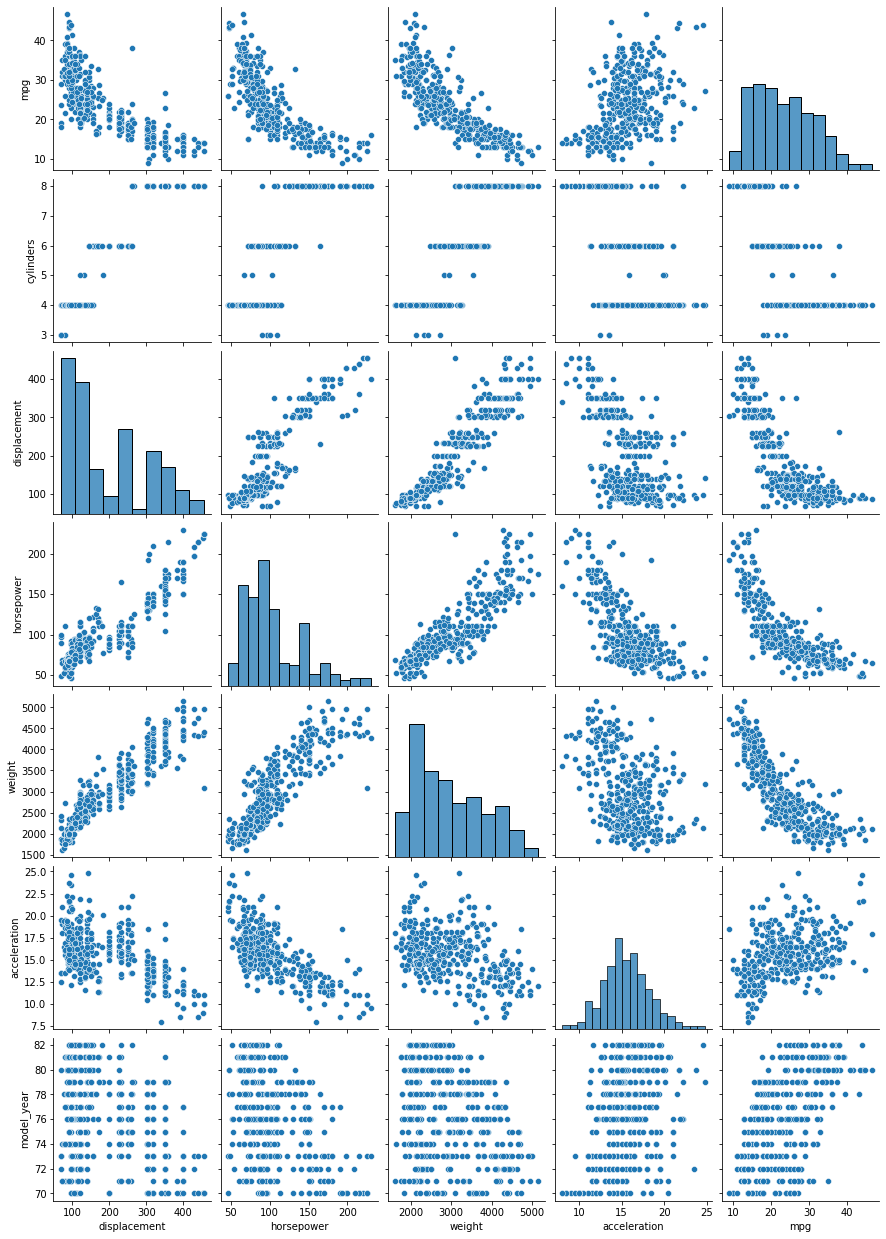

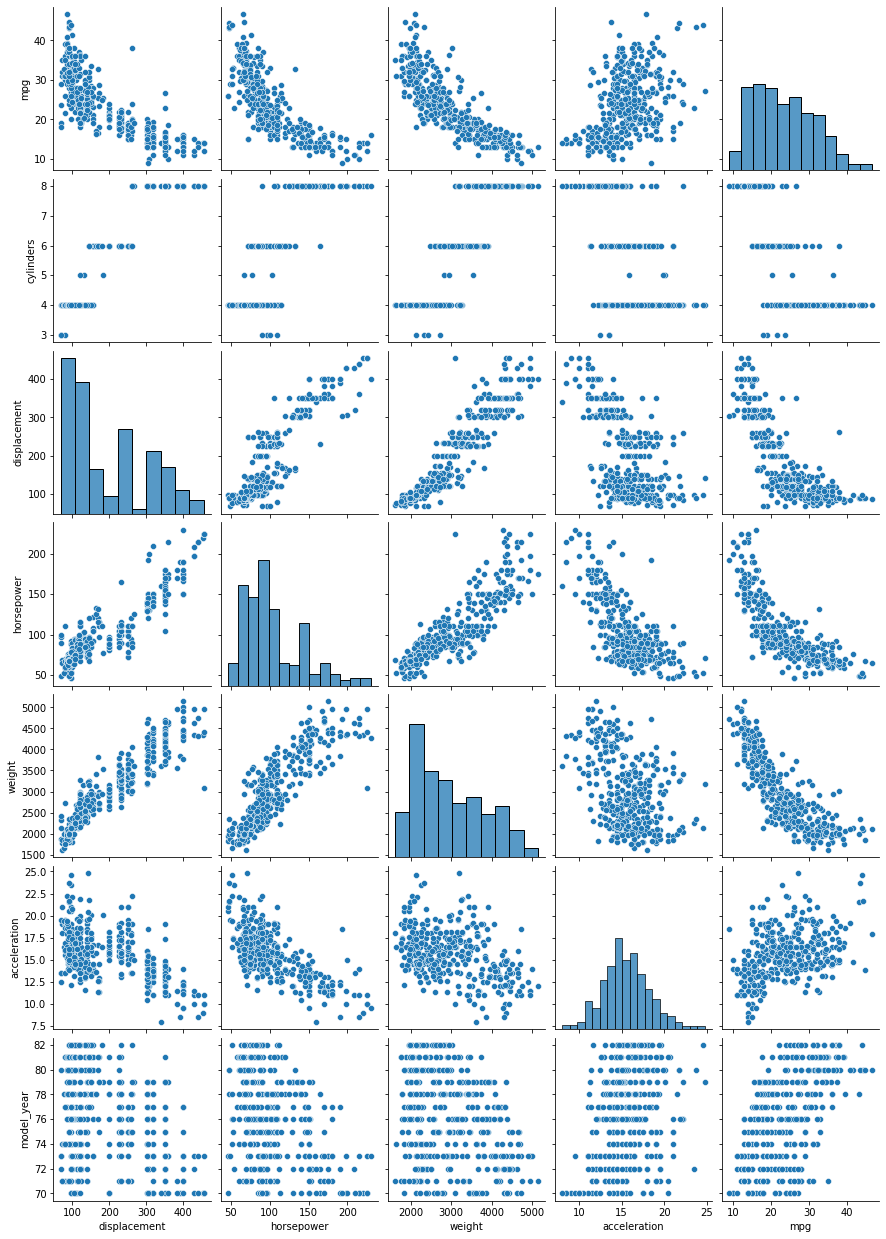

In [16]:
sns.pairplot(df, x_vars= ['displacement', 'horsepower', 'weight', 'acceleration', 'mpg'])

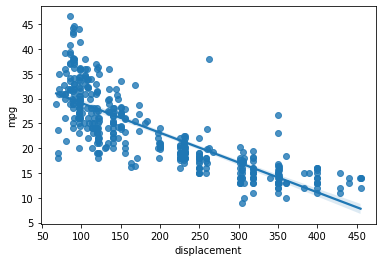

In [17]:
sns.regplot(x = 'displacement', y = 'mpg', data =df);

Define Target Variable y and Feature X

In [18]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [19]:
y = df['mpg']

In [20]:
y.shape

(392,)

In [21]:
x = df[['displacement', 'horsepower', 'weight', 'acceleration']]

In [22]:
x.shape

(392, 4)

Scaling Data

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
ss = StandardScaler()

In [27]:
x = ss.fit_transform(x)

In [28]:
x

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [29]:
pd.DataFrame(x).describe()

0             1             2             3
count  392.000000  3.920000e+02  3.920000e+02  3.920000e+02
mean     0.000000  1.812609e-17 -1.812609e-17 -1.812609e-17
std      1.001278  1.001278e+00  1.001278e+00  1.001278e+00
min     -1.209563 -1.520975e+00 -1.608575e+00 -2.736983e+00
25%     -0.855532 -7.665929e-01 -8.868535e-01 -6.410551e-01
50%     -0.415384 -2.853488e-01 -2.052109e-01 -1.499869e-02
75%      0.778276  5.600800e-01  7.510927e-01  5.384714e-01
max      2.493416  3.265452e+00  2.549061e+00  3.360262e+00

Train Test Split Data

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7, random_state = 229)

In [32]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((274, 4), (118, 4), (274,), (118,))

Liner Regression Model

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lr =LinearRegression()

In [37]:
lr.fit(x_train, y_train)

LinearRegression()

In [38]:
lr.intercept_

23.411983006953083

In [40]:
lr.coef_

array([-0.83442408, -2.34888334, -3.65019869, -0.49125882])

Milleage=23.4 - 1.05 Displacement - 1.68 Horsepower - 4.10 Weight-0115Acceleration+error

Predict Test Data

In [41]:
y_pred = lr.predict(x_test)

In [42]:
y_pred

array([31.21063659, 12.88683127, 25.62913536, 21.73652377, 20.68157726,
       22.7001999 , 24.21335639, 21.85099039, 29.41682903, 13.22408355,
       14.40979866, 19.64099406, 22.6204757 , 27.6198483 , 29.77864166,
       14.42188013, 19.31939514, 25.31646119, 24.11201673, 23.61673609,
        9.58199276, 30.90457471, 29.31331734, 31.5868889 , 11.32557203,
       25.34190511, 18.42681174, 28.37854038, 11.55048417, 25.98352029,
       25.95582735, 20.17339701,  9.05110208, 30.48875049, 18.5448085 ,
       31.80277786, 23.57677983, 22.43217614, 25.94135501,  9.50319546,
       28.20450828, 13.48368999, 10.87157906, 10.19433795, 22.07134417,
       29.32891068, 24.60483534, 20.14319339, 15.27532075, 31.10258447,
       24.9396577 , 23.7454694 , 27.34284538, 20.23031056, 16.3247348 ,
       14.12583101, 23.44339105, 23.31872128, 26.11902133, 20.78249512,
       29.37921286, 14.69516582, 28.5824987 , 15.2839422 , 20.01275792,
       24.19677837, 24.56501362, 30.4782762 , 16.40690773, 13.67

Model Accuracy

In [43]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [44]:
mean_absolute_error(y_test, y_pred)

3.1662649505466054

In [45]:
mean_absolute_percentage_error(y_test, y_pred)

0.1381604447185165

In [46]:
r2_score(y_test, y_pred)

0.7420593925480177